## Batch Normalization

- Batch Normalization is an algorithmic method which makes the training of Deep NN faster(meaning within few epochs we will be able to train a model with high accuracy) and more stable(Data Distribution wise -> see point 3 for explanation).

- It is added right before the Dense layer.

- Why before dense layer added?<br>
Ans: To avoid the Chinese whisper kind of thing from happening(Peas>Bees>Knees>Cheese>Fleas).<br> 
It might happen that when data is flowing from one hidden layer to another, then its distribution will change. So, in order to ensure that data flowing within hidden layers stays in the same scale or distribution we are including the batch normalization mechanism right before each dense layer which normalizes the distribution of data getting feed to each layer before processing(weighted summation followed by activation function and all)<br> 
If data's nature(distribution) keeps on changing within layer then we would be not able to train a better model hence it's very important to make sure that data's nature while it is traversing b/w hidden layers stay same or frozen

- An example of Batch normalization could be changing the Standard normally distributed data into normally distributed data using Zscore(mean=0 and std dev =10), skleaen implementaion could be StandardNormal()

- Technical name given to this phenomena of data distribution getting changed b/w hidden layers is <b><i>Internal Covariance Shift</i></b> which as discussed can be resolved by the addition of Batch Normalization layer right before every hidden layer.

- See below snip(Distribution of Data Vs Cost Function) to undetstand why normally distributed data is faster as compared to non normally distributed data:
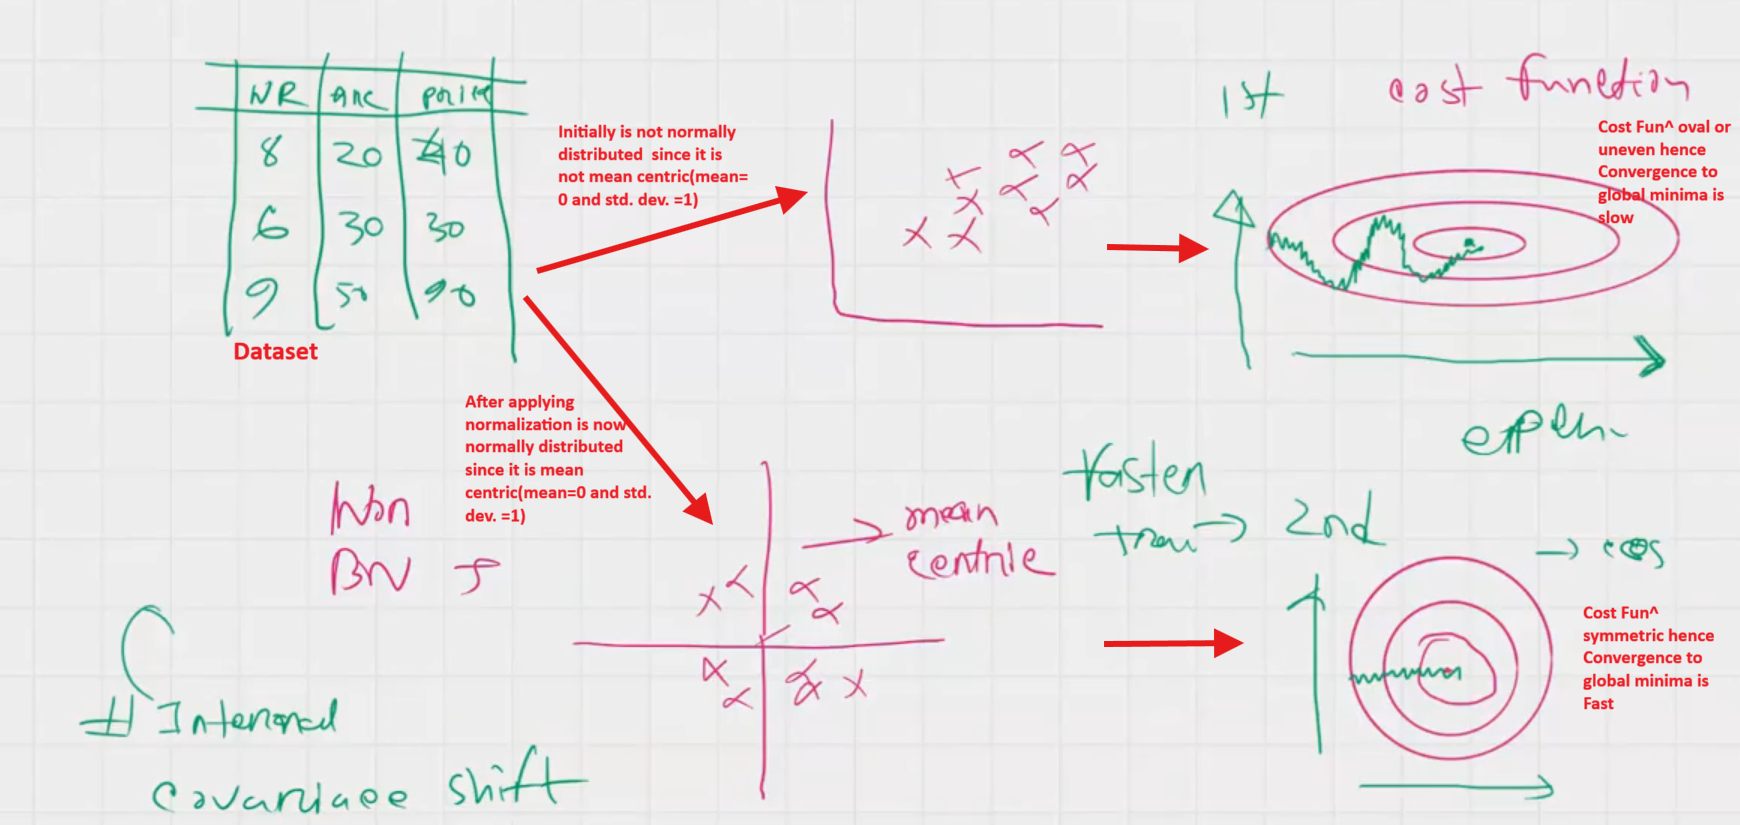



## Imp Note:
Their is the debate on when to add the batch normalization layer(before the activation fun^ or after the activation fun^). So, as per our disccusion always use it <b>after the activation function</b>.

### Before applying Batch Normalization

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Appying scaling (minmax)

X_valid, X_train = X_train_full[:5000] / 255. , X_train_full[5000:] / 255.  ##Why dividing by 255? Refer to ANN Classification Practical implementation notes
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

#scale test data
X_test = X_test / 255.

In [5]:
LAYERS = [
      tf.keras.layers.Flatten(input_shape = [28,28]),
      tf.keras.layers.Dense(300, kernel_initializer="he_normal"),  #using he_normal since here we are using relu. Recall this is already discussed
      tf.keras.layers.LeakyReLU(), ##This leakyRelu activation fun^ could be added in the above defined hidden layer using activation attribute. This is another new way of adding activation fun^ to the hidden layer
      tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
      tf.keras.layers.LeakyReLU(),
      tf.keras.layers.Dense(10, activation='softmax')

]

model = tf.keras.models.Sequential(LAYERS)

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy']) ## Recall ANN classification implementation to known the reason of selecting these parameters

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

In [9]:
start = time.time()  ## We want to determine the training time hence using this

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


end = time.time()  ## This will capture the time at which above line of code's execution if finished


#total time
print(f"Runtime of the program is {end - start}") 

Epoch 1/10
1719/1719 [==============================] - 10s 3ms/step - loss: 1.5042 - accuracy: 0.6235 - val_loss: 0.9364 - val_accuracy: 0.8064
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7350 - accuracy: 0.8335 - val_loss: 0.5780 - val_accuracy: 0.8598
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5322 - accuracy: 0.8651 - val_loss: 0.4626 - val_accuracy: 0.8826
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4526 - accuracy: 0.8786 - val_loss: 0.4066 - val_accuracy: 0.8896
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4098 - accuracy: 0.8875 - val_loss: 0.3731 - val_accuracy: 0.8978
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8936 - val_loss: 0.3507 - val_accuracy: 0.9036
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3630 - accuracy: 0.8965 - val_loss: 0.3346 - val_accuracy

### From above we can conclude that without applying Batch Normalization, it took around 48 sec for model to get trained over 10 epoch. Also we get around 91% accuracy

## After batch Normalization

In [11]:
del model #deleting prev model

NameError: ignored

In [12]:
LAYERS = [
      tf.keras.layers.Flatten(input_shape = [28,28]),
      tf.keras.layers.BatchNormalization(), #This is how we add the BatchNormalization layer after activation function
      tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
      tf.keras.layers.LeakyReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
      tf.keras.layers.LeakyReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='softmax')

]

model = tf.keras.models.Sequential(LAYERS)

In [13]:
model.summary()

## Observe we are getting 2368 non trainable parameters which are related to Batch Normalization layer. Also, these are predefined and will not be tweak during backpropagation

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 300)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 100)              

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

In [15]:
start = time.time()

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


end = time.time()


#total time
print(f"Runtime of the program is {end - start}")

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.8902 - accuracy: 0.7258 - val_loss: 0.4803 - val_accuracy: 0.8626
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4769 - accuracy: 0.8610 - val_loss: 0.3678 - val_accuracy: 0.8932
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4042 - accuracy: 0.8815 - val_loss: 0.3202 - val_accuracy: 0.9070
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3639 - accuracy: 0.8928 - val_loss: 0.2913 - val_accuracy: 0.9152
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3376 - accuracy: 0.9011 - val_loss: 0.2736 - val_accuracy: 0.9230
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3170 - accuracy: 0.9080 - val_loss: 0.2589 - val_accuracy: 0.9260
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3023 - accuracy: 0.9116 - val_loss: 0.2474 - val_accuracy:

### From above we can conclude that after applying Batch Normalization, it took around 69 sec for model to get trained over 10 epoch. Also we get around 93% accuracy which is 2% more as compared with the case where we haven't applied the Batch Normalization.

### Hence we can conclude that using Batch Normalization we are able to get the best accuracy in less epochs. Hence, it becomes faster(not wrt time but wrt no. of epochs taken to get best accuracy)